In [ ]:

1. Compute the equilibrium variance in the AR(1) process.
2. Compute the closed form solution for OU for X(t) as a function
of X(0) and parameters.

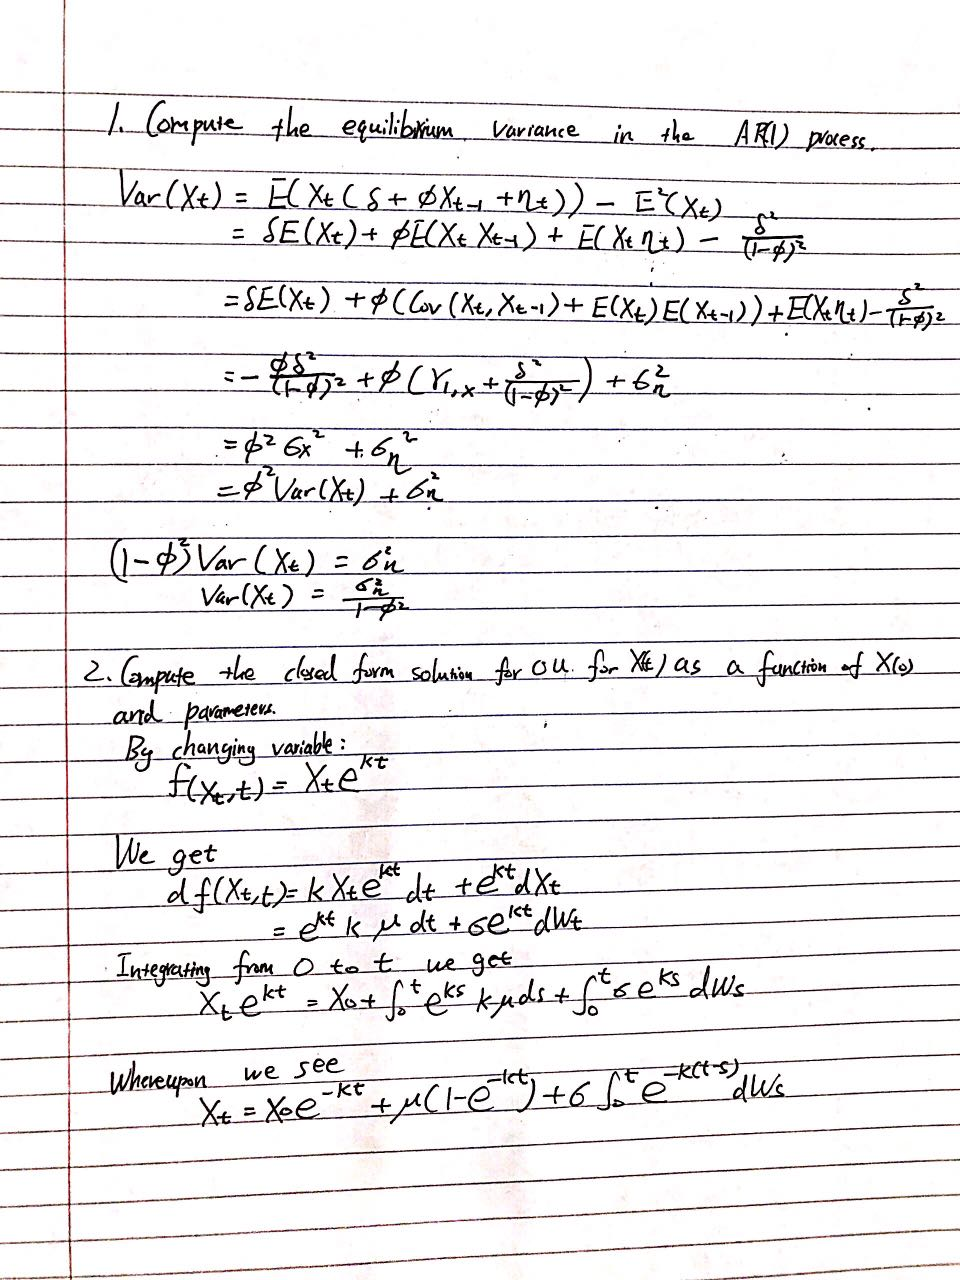

# 3. Show that VIX time series from 1990 to now (from Yahoo Finance) rejects unit root in the ADF test.

In [10]:
import requests
import pytz
import pandas as pd
import sqlite3 as db
from urllib.request import urlopen
import numpy as np
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
from pandas import DataFrame, read_csv

sectors = ['VIX']
sec_etf = pdr.get_data_yahoo(sectors,start='1990-4-3', end='2018-4-3')
sectors_r = sec_etf['Adj Close'].dropna(axis=0, how='any')
sectors_r.head(100)

[*********************100%***********************]  1 of 1 downloaded


Date
2014-12-04    28447.699219
2014-12-05    26056.500000
2014-12-08    23582.800781
2014-12-09    21274.000000
2014-12-10    19295.000000
2014-12-11    17728.300781
2014-12-12    19047.599609
2014-12-15    19212.500000
2014-12-16    17480.900391
2014-12-17    16409.000000
2014-12-18    17563.400391
2014-12-19    16738.800781
2014-12-22    16821.300781
2014-12-23    18470.400391
2014-12-24    18800.199219
2014-12-26    17068.599609
2014-12-29    15914.200195
2014-12-30    16409.000000
2014-12-31    16903.699219
2015-01-02    16903.699219
2015-01-05    16821.300781
2015-01-06    18470.400391
2015-01-07    19872.199219
2015-01-08    20119.599609
2015-01-09    20614.300781
2015-01-12    18965.199219
2015-01-13    19707.300781
2015-01-14    20119.599609
2015-01-15    22098.500000
2015-01-16    21521.300781
                  ...     
2015-03-19    12698.400391
2015-03-20    12698.400391
2015-03-23    12616.000000
2015-03-24    12616.000000
2015-03-25    12616.000000
2015-03-26    12616.000

In [17]:
from statsmodels.tsa.stattools import adfuller
Y = sectors_r.values
result = adfuller(Y, maxlag=None, autolag=None, regression='c')
print(result)

(-3.595515973449482, 0.005847333624684737, 21, 765, {'1%': -3.438926964986094, '5%': -2.8653254941943174, '10%': -2.5687857802554572})


In [23]:
print('Test statistic is {}; p-value: {}; crit. val.:{}; '.format(result[0], result[1],result[4]))

Test statistic is -3.595515973449482; p-value: 0.005847333624684737; crit. val.:{'1%': -3.438926964986094, '5%': -2.8653254941943174, '10%': -2.5687857802554572}; 


In [15]:
result

(-2.698228313036742,
 0.23681891374072572,
 21,
 765,
 {'1%': -3.9706529934914143,
  '10%': -3.130436626092361,
  '5%': -3.4162446265323902})

In [ ]:
Test statistic
pvalue : float
    MacKinnon's approximate p-value based on MacKinnon (1994, 2010)
usedlag : int
    Number of lags used
nobs : int
    Number of observations used for the ADF regression and calculation of
    the critical values
critical values : dict
    Critical values for the test statistic at the 1 %, 5 %, and 10 %
    levels. Based on MacKinnon (2010)